### AUC - ROC Curve

In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the True Positive Rate (TPR) (the probability of detection) versus the False Positive Rate (FPR) (the probability of false alarm) at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

Suppose we have an imbalanced data set where the majority of our data is of one value. We can obtain high accuracy for the model by predicting the majority class.

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n) # n_0 = 500
n_1 = int(ratio * n)     # n_1 = 9500

#print ("n_0 =", n_0)
#print ("n_1 =", n_1)

y = np.array([0] * n_0 + [1] * n_1) # A list of 500 0s and 9500 1s.

#print ("y =", y) 

# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%

y_proba = np.array([1]*n) # A list of 10000 1s.
y_pred = y_proba > .5     # A list of 10000 Trues since 1 is always greater than .5

#print ("y_proba =", y_proba) 
#print ("y_pred =", y_pred)

print(f'accuracy score: {accuracy_score(y, y_pred)}') # Accuracy score will be calculated by comparing 500 0s + 9500 1s (y)
                                                      # with 10000 1s (y_pred)
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)                                # 9500 True positives, 500 False positives, 0 True negatives, 0 False negatives
                                            # Down right TP, down left FN, up left TN, up right FP
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


Although we obtain a very high accuracy, the model provided no information about the data so it's not useful. We accurately predict class 1 100% of the time while inaccurately predict class 0 0% of the time. At the expense of accuracy, it might be better to have a model that can somewhat separate the two classes.

In [2]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(np.random.uniform(0, .7, n_0).tolist() + np.random.uniform(.3, 1, n_1).tolist()) # n_0=500, n_1=9500

# random.uniform(low=0.0, high=1.0, size=None): Draw samples from a uniform distribution.
# print ("y_proba_2", y_proba_2)

y_pred_2 = y_proba_2 > .5

print ("y_pred_2", y_pred_2)

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat) # Down right TP, down left FN, up left TN, up right FP
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

y_pred_2 [False False  True ...  True  True  True]
accuracy score: 0.7179
Confusion matrix
[[ 353  147]
 [2674 6826]]
class 0 accuracy: 0.706
class 1 accuracy: 0.7185263157894737


For the second set of predictions, we do not have as high of an accuracy score as the first but the accuracy for each class is more balanced. Using accuracy as an evaluation metric we would rate the first model higher than the second even though it doesn't tell us anything about the data.

In cases like this, using another evaluation metric like AUC would be preferred.

model 1 AUC score: 0.5


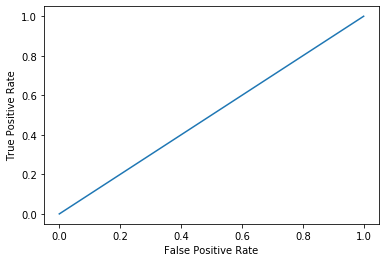

In [5]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based on the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob) # First parameter is True binary labels.
                                                     # Second parameter is the probability estimates of the positive class
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
# model 1    
plot_roc_curve(y, y_proba) # y is a list of 500 0s and 9500 1s. y_proba is a list of 10000 1s.

print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}') # First parameter is True labels or binary label indicators.
                                                         # Second parameter is target scores
                                                         # Returns a float which is the Area Under the Curve score        

For more information about AUC-ROC Curve see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

model 2 AUC score: 0.8444246315789474


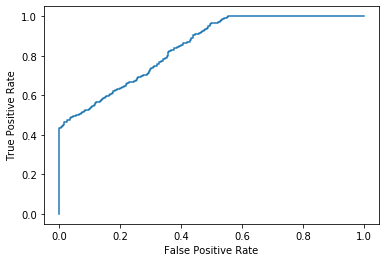

In [4]:
# model 2

plot_roc_curve(y, y_proba_2)

print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

An AUC score of around .5 would mean that the model is unable to make a distinction between the two classes and the curve would look like a line with a slope of 1.

An AUC score closer to 1 means that the model has the ability to separate the two classes and the curve would come closer to the top left corner of the graph.

### Probabilities

Because AUC is a metric that utilizes probabilities of the class predictions, we can be more confident in a model that has a higher AUC score than one with a lower score even if they have similar accuracies.

In the data below, we have two sets of probabilites from hypothetical models. The first has probabilities that are not as "confident" when predicting the two classes (the probabilities are close to .5). The second has probabilities that are more "confident" when predicting the two classes (the probabilities are close to the extremes of 0 or 1).

In [10]:
n = 10000
y = np.array([0] * n + [1] * n) # 10000 0s and 10000 1s.

#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() + # random.uniform(low=0.0, high=1.0, size=None)
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)

# print (len (y_prob_1))

y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.74825
model 2 accuracy score: 0.74945
model 1 AUC score: 0.7739544199999999
model 2 AUC score: 0.86007581


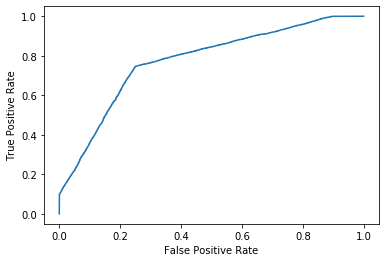

In [11]:
# Plot model 1
plot_roc_curve(y, y_prob_1)

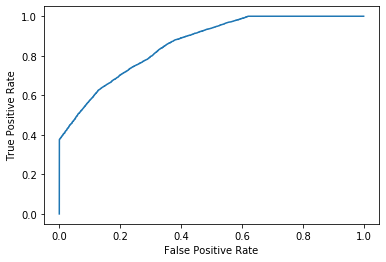

In [15]:
# Plot model 2
plot_roc_curve(y, y_prob_2)

Even though the accuracies for the two models are similar, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give you higher accuracy when predicting future data.